# Exploration write-up
# Name: Weiwei Zheng
# Topic: Media Usage, Employment Status and Political Affiliation

In [345]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
sns.set()
plt.style.use("seaborn-whitegrid")
%matplotlib inline

In [346]:
# load in data
data = pd.read_csv("exploratory-data-analysis/data/gss2012.csv")
data_analyze = data[data.news != None][data.tvhours != None][data.wrkstat != None][data.polviews != None][data.partyid != None]

## Introduction
In the digital age, traditional media is on the verge of being obsolete. In face of diverse platforms providing audience with converged media facilities, traditional media providers, such as news press and public media groups are trying hard to conquer new media tools and regain usage volumes. In order to find way out and tailor to the ongoing societal transformation, it’s necessary to examine the demographic attributes of subgroups using different media. By exploring the GSS2012 data set, I found out several interesting relations between traditional media usage, employment status, and political affiliation, which might inspire future analysis in contemporary media usage and media ecology.

The research questions are proposed as follow: 1) Do people with different preference to traditional media tools have different employment status? 2) Do people with different preference to traditional media tools have different political affiliations? 

## Basic Findings
I mainly look into two media usage behavior, newspaper reading and TV watching. In the dataset, about one-fourth of the people never read newspaper and half of the people never watch TV on average during a week. We can tell the two media became unpopular among US population even five years ago. 


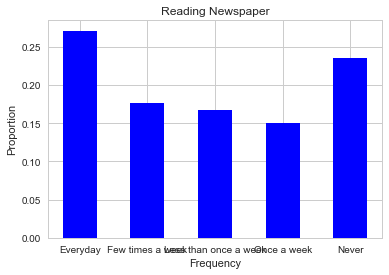

In [352]:
# distribution of newspaper reading
fig, ax = plt.subplots()
news_value = np.array([353, 230, 217, 195, 306])
news_label = ["Everyday", "Few times a week", "Less than once a week", "Once a week", "Never"]
ax.bar(range(5), news_value/sum(news_value), tick_label = news_label, width = 0.5, color="b")
ax.set(xlabel = "Frequency", ylabel = "Proportion", title = "Reading Newspaper")

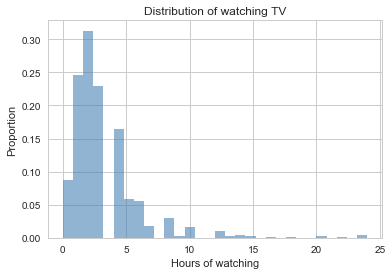

In [357]:
#distribution of TV watching
filter_2 = (data_analyze.tvhours >= 0)
tv_watch_normal = data_analyze[filter_2]["tvhours"]
plt.hist(tv_watch_normal, bins=30, normed=True, alpha=0.6,
                histtype='stepfilled', color='steelblue',
                edgecolor='none')
plt.title("Distribution of watching TV")
plt.xlabel("Hours of watching")
plt.ylabel("Proportion")

## Hypotheses
Newspaper and TV are two distinct kinds of media. The target audience of newspapers are usually the senior, those not used to new media applications, people with low socioeconomic status, those without access to Internet, and the educated, who therefore have the patience and also ability to read between involved lines in the printed format. And TV, on the other hand, doesn’t have high threshold of usage, which tends to attract people with abundant free time to follow the fixed TV time slots but impatient or unable to get complicated information from printed media.

## Work Status
As discovered, the groups of people keeping house and without a job have the highest propensity of never reading newspaper compared with other subgroups, with more than 30 percent. Meanwhile, the retired have the highest propensity of reading newspaper every day, which tallies with our hypotheses.

In [368]:
news_label = ["Everyday", "Few times a week", "Less than once a week", "Never", "Once a week"]

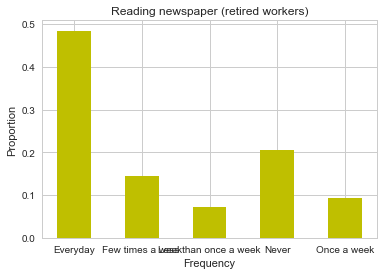

In [396]:
filter1 = (data_analyze.wrkstat == "RETIRED")
value_list = list(data_analyze[filter1].groupby("news").size())
total = sum(value_list)
fig = plt.figure()
plt.bar(range(5), value_list/total, tick_label = news_label, width = 0.5, color="y")
plt.title("Reading newspaper (retired workers)")
plt.xlabel("Frequency")
plt.ylabel("Proportion")
plt.show()

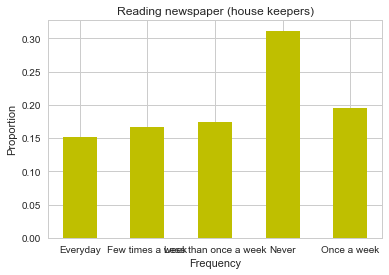

In [395]:
filter2 = (data_analyze.wrkstat == "KEEPING HOUSE")
value_list = list(data_analyze[filter2].groupby("news").size())
total = sum(value_list)
fig = plt.figure()
plt.bar(range(5), value_list/total, tick_label = news_label, width = 0.5, color="y")
plt.title("Reading newspaper (house keepers)")
plt.xlabel("Frequency")
plt.ylabel("Proportion")
plt.show()

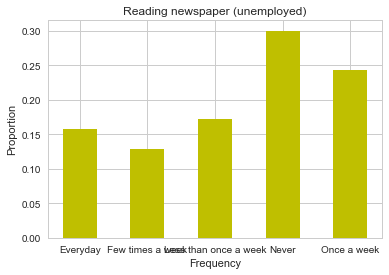

In [393]:
filter3 = (data_analyze.wrkstat == "UNEMPLOYED, LAID OFF")
value_list = list(data_analyze[filter3].groupby("news").size())
total = sum(value_list)
fig = plt.figure()
plt.bar(range(5), value_list/total, tick_label = news_label, width = 0.5, color="y")
plt.title("Reading newspaper (unemployed)")
plt.xlabel("Frequency")
plt.ylabel("Proportion")
plt.show()

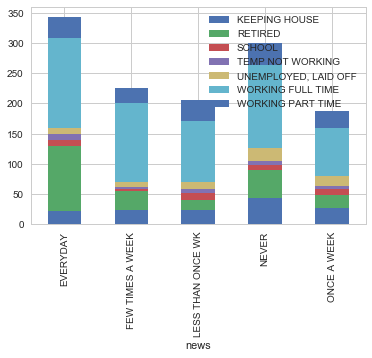

In [376]:
fancy_data = data_analyze.groupby(["news","wrkstat"]).size().unstack().plot.bar(stacked = True).legend(loc = "best")

As for watching TV, as expected, the subgroup with full-time job have the lowest frequency, but surprisingly, the subgroups of the unemployed/laid-off and the temporarily jobless also have a relatively low frequency of watching TV, unlike the house keepers and retired people. In this sense, the watching TV behavior might not be necessarily correlated with the amount of time available but other dimensions linked with people’s social roles and corresponding daily practices. 

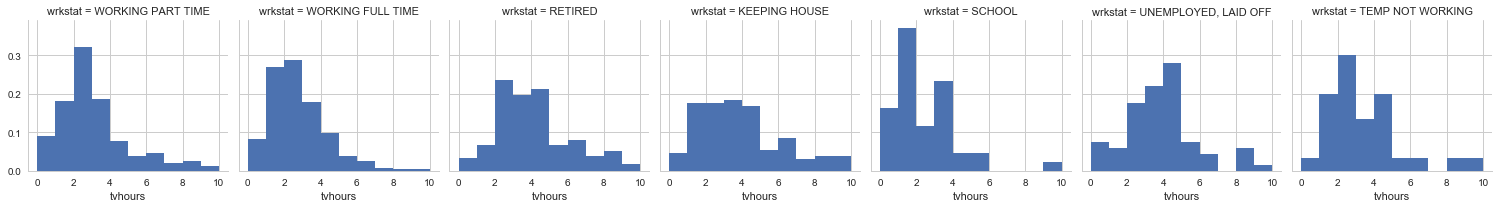

In [380]:
data_wrkstat_tvhours =  data_analyze.filter(["wrkstat", "tvhours"], axis =1)
grid = sns.FacetGrid(data_wrkstat_tvhours, col="wrkstat", margin_titles=True)
grid.map(plt.hist, "tvhours", bins=np.linspace(0, 10, 11), normed = True)

Through looking into employment status and traditional media usage, I got some insights about the social implication behind traditional media ecology and had some ideas about how to conduct forthcoming research in this subfield. First, as main information channel of the underrepresented, traditional media restrict users’ insights to get diverse viewpoints and deprive them of opportunities to participate in public affairs by utilizing the self-automating new media platforms. As time goes on, these groups of people will be increasingly marginalized and finally alienated from the majority. Compared with others, both their facilities and abilities are relatively low-end, which is detrimental to their well-being in maintaining or improving their social status. Second, to get a larger picture of media ecology, analysis of Internet usage should also be accounted for so as to measure how significantly different is the media usage among different social spectrums.

## Political Affiliations 
Considering the active political environment in the United States, political affiliations are usually considered to be an interesting dimension to understand people's socialized conducts. And people’s social identity might be slightly distinguished from their cognitive thinking. So I pick up two variables in the dataset, party identity and political viewpoints, to represent different layers of people’s political affiliation. The distribution of the two variables are outstandingly different. Though there are more democrats than republicans in party identity, most people (except those with moderate viewpoints) self-reported as conservatives.

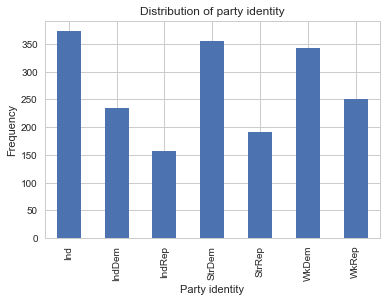

In [386]:
party_identity = data_analyze.groupby("partyid").size().plot.bar()
plt.xlabel("Party identity")
plt.ylabel("Frequency")
plt.title("Distribution of party identity")

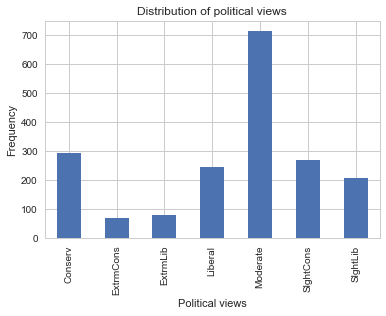

In [387]:
poli_views = data_analyze.groupby("polviews").size().plot.bar()
plt.xlabel("Political views")
plt.ylabel("Frequency")
plt.title("Distribution of political views")

As for the frequency of reading newspapers, being an independent party member will have greater possibility of never reading newspapers than others, while being a strong democrat or strong republican will have greater possibilities of reading newspapers every day or for few times a week. Political membership seems to be closely related to the frequency of reading newspaper. A potential explanation might be for people extremely concerned about political incidents they might be more willing to follow articles on newspapers where they can get more detailed and intensive accounts of incidents concerned than on mobile phones. One the other hand, those not interested in political issues may find it bothering reading lengthy accounts on newspaper. 

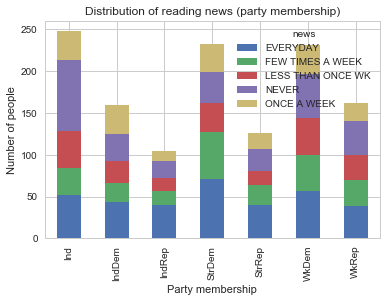

In [389]:
freq_party_news = data_analyze.groupby(["partyid", "news"]).size().unstack().plot.bar(stacked = True)
plt.xlabel("Party membership")
plt.ylabel("Number of people")
plt.title("Distribution of reading news (party membership)")

In terms of watching TV, though the slightly different observation needs to be verified by statistical testing, the results demonstrate that people with both stronger party membership identification and political viewpoints tend to have higher frequency. Again, when coming to political affiliation, media usage can be symbolic of ones’ degree in political belief. We can assume that the stronger one’s political faith, the more frequent for him to keep track of political or social affairs through different media platforms.

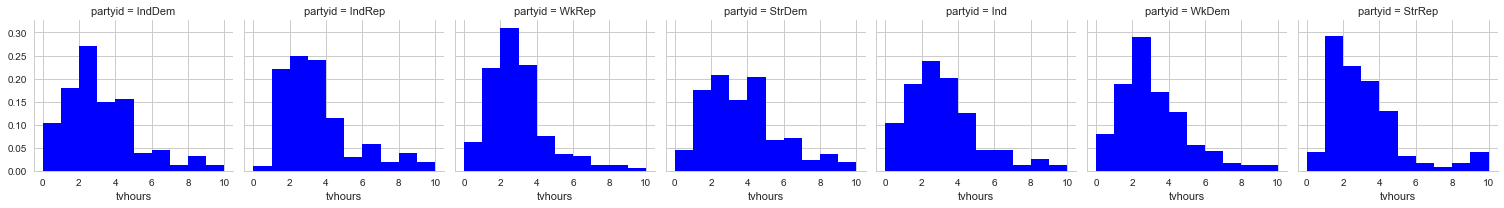

In [392]:
data_partyid_tvhours =  data_analyze.filter(["partyid", "tvhours"], axis =1)
grid = sns.FacetGrid(data_partyid_tvhours, col="partyid", margin_titles=True)
grid.map(plt.hist, "tvhours", bins=np.linspace(0, 10, 11), normed = True, color = "blue")

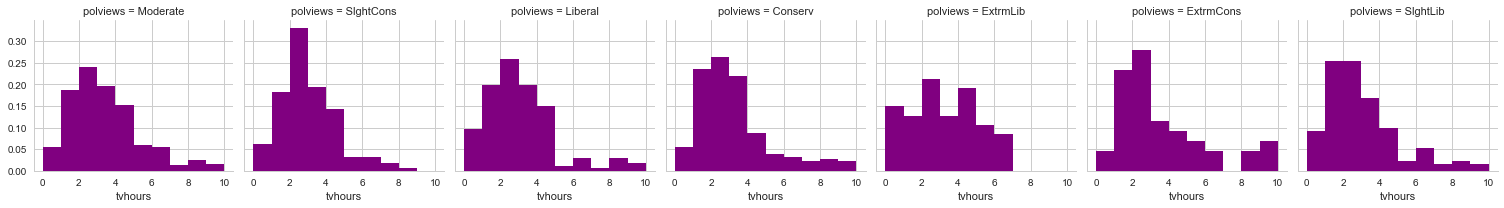

In [397]:
data_poliviews_tvhours =  data_analyze.filter(["polviews", "tvhours"], axis =1)
grid = sns.FacetGrid(data_poliviews_tvhours, col="polviews", margin_titles=True)
grid.map(plt.hist, "tvhours", bins=np.linspace(0, 10, 11), normed = True, color = "purple")

The report only summarizes interesting facts observed through basic descriptive statistical analysis. No wonder exploratory analysis provides insights for interesting topics, but involved statistical modeling are necessary in further analysis over the subtle difference of media usage behavior of different subgroups.